In [125]:
#ignorando los warnings
import warnings
warnings.filterwarnings('ignore')

In [126]:
#Se importan las funciones personalizadas
import sys
sys.path.append('..\\utils\\')

## 1. Importando las librerías

In [127]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from utils import regression_performance, regression_visualization

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import VotingRegressor, BaggingRegressor, AdaBoostRegressor

## 2. Leyendo los datos

In [128]:
dataset = pd.read_csv('..\datos_procesados\datos_procesados.csv', sep=';')
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## 3. Separando los datos en las variables predictoras (**X**) y la variable a predecir (y)

In [129]:
X = dataset.drop(columns=['charges'], axis=1)
y = dataset['charges']

## 4. Realizando el escalamiento robusto de las variables predictoras

In [130]:
X_esc = pd.DataFrame(data=RobustScaler().fit_transform(X=X), columns=X.columns.to_list())
X_esc.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-0.833333,-0.297265,-0.5,-1.0,1.0,0.0,0.0,1.0
1,-0.875000,0.400713,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.458333,0.309156,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.250000,-0.914982,-0.5,0.0,0.0,1.0,0.0,0.0
4,-0.291667,-0.180737,-0.5,0.0,0.0,1.0,0.0,0.0


## 5. Separando los datos en train y test

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_esc, y, test_size=0.3, random_state=42)

## 6. Modelos de aprendizaje

#### 6.1 Creando los diferentes modelos

In [132]:
#Regresión lineal simple
rg_li = LinearRegression()

#Regresión polinómica
rg_po = LinearRegression()

#Regresión Ridge
rg_rid = Ridge(alpha=10)

#Regresión Lasso
rg_lasso = Lasso(alpha=0.01)

#Regresión lineal SVM
rg_li_svm = LinearSVR(epsilon=0.4, C=10000)

#Regresión polinomial SVM
rg_po_svm = SVR(kernel='poly', degree=2, epsilon=0.4, C=10000)

#Regresion árbol de decisión
rg_tree = DecisionTreeRegressor(max_depth=5)

#-----Ensambles-----------------------------------------------------

#Métodos de ensamble
rg_voting = VotingRegressor(
    estimators=[('rg_li',rg_li), ('rg_po',rg_po), ('rg_li_svm', rg_li_svm), ('rg_po_svm', rg_po_svm), ('rg_tree', rg_tree)],
    n_jobs=-1
)

#regresión a través de Bagging
rg_bagging = BaggingRegressor(estimator=rg_tree, n_estimators=1000, n_jobs=-1)

#Regresión a través de Boosting
rg_boosting = AdaBoostRegressor(estimator=rg_tree, n_estimators=25)

#### 6.2 Entrenando los modelos

In [133]:
#Entrenado el modelo de regresión lineal
rg_li.fit(X=X_train, y=y_train)

#Entrenando el modelo de regresión polinómica
polig_reg = PolynomialFeatures(degree=2)
X_train_poli    = polig_reg.fit_transform(X=X_train)
X_test_poli     = polig_reg.fit_transform(X=X_test) 
rg_po.fit(X=X_train_poli, y=y_train)

#Entreando el modelo de regresión Ridge
rg_rid.fit(X=X_train, y=y_train)

#Entreando el modelo de regresión Lasso
rg_lasso.fit(X=X_train, y=y_train)

#Entrenando el modelo de regresión lineal SVM
rg_li_svm.fit(X=X_train, y=y_train)

#Entrenando el modelo de regresión polinomial SVM
rg_po_svm.fit(X=X_train, y=y_train)

#Entrenando el modelo de regresión árbol de decisión
rg_tree.fit(X=X_train, y=y_train)

#-----Ensambles-----------------------------------------------------

rg_voting.fit(X=X_train, y=y_train)

rg_bagging.fit(X=X_train, y=y_train)

rg_boosting.fit(X=X_train, y=y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5), n_estimators=25)

#### 6.3 Evaluando el desempeño de los modelos

In [134]:
lista_predicciones = []

#Evaluando el desempeño de la regresión lineal
y_pred_li_train = rg_li.predict(X=X_train)
y_pred_li_test = rg_li.predict(X=X_test)

#Evaluando el desempeño del modelo de gresión polinómica
y_pred_po_train = rg_po.predict(X=X_train_poli)
y_pred_po_test  = rg_po.predict(X=X_test_poli)

#Evaluando el desempeño de la regresión Ridge
y_pred_rid_train = rg_rid.predict(X=X_train)
y_pred_rid_test = rg_rid.predict(X=X_test)

#Evaluando el desempeño de la regresión Lasso
y_pred_lasso_train = rg_lasso.predict(X=X_train)
y_pred_lasso_test = rg_lasso.predict(X=X_test)

#Evaluando el desempeño de la regresión lineal SVM
y_pred_li_svm_train = rg_li_svm.predict(X=X_train)
y_pred_li_svm_test = rg_li_svm.predict(X=X_test)

#Evaluando el desempeño de la regresión lineal SVM
y_pred_po_svm_train = rg_po_svm.predict(X=X_train)
y_pred_po_svm_test = rg_po_svm.predict(X=X_test)

#Evaluando el desempeño de la regresión árbol de decisión
y_pred_tree_train = rg_tree.predict(X=X_train)
y_pred_tree_test = rg_tree.predict(X=X_test)

#-----Ensambles-----------------------------------------------------

#Regresión ensamble voting
y_pred_voting_train = rg_voting.predict(X=X_train)
y_pred_voting_test = rg_voting.predict(X=X_test)

#Regresión mediante bagging
y_pred_bagging_train = rg_bagging.predict(X=X_train)
y_pred_bagging_test = rg_bagging.predict(X=X_test)

#Regresión mediante boosting
y_pred_boosting_train = rg_boosting.predict(X=X_train)
y_pred_boosting_test = rg_boosting.predict(X=X_test)

#Mostrando el desempeño de todos los modelos
lista_predicciones.append((y_pred_li_train, y_pred_li_test, 'Regresión Lineal'))
lista_predicciones.append((y_pred_po_train, y_pred_po_test, 'Regresión Polinomial'))
lista_predicciones.append((y_pred_rid_train, y_pred_rid_test, 'Regresión Ridge'))
lista_predicciones.append((y_pred_lasso_train, y_pred_lasso_test, 'Regresión Lasso'))
lista_predicciones.append((y_pred_li_svm_train, y_pred_li_svm_test, 'Regresión Lineal SVM'))
lista_predicciones.append((y_pred_po_svm_train, y_pred_po_svm_test, 'Regresión Polinomial SVM'))
lista_predicciones.append((y_pred_tree_train, y_pred_tree_test, 'Regresión Árbol de Decisión'))
lista_predicciones.append((y_pred_voting_train, y_pred_voting_test, 'Regresión Ensamble Voting'))
lista_predicciones.append((y_pred_bagging_train, y_pred_bagging_test, 'Regresión Ensamble Bagging'))
lista_predicciones.append((y_pred_boosting_train, y_pred_boosting_test, 'Regresión Ensamble Bagging'))

for predicciones in lista_predicciones:
    regression_performance(
        y_train_ = y_train,
        y_train_pred_ = predicciones[0],
        y_test_ = y_test,
        y_test_pred_ = predicciones[1],
        nombre_modelo = predicciones[2]
    )




Desempeño modelos de gresión
Modelo: Regresión Lineal

R^2 train: 0.74
R^2 test: 0.77

RMSR train: 65
RMSR test: 65


Desempeño modelos de gresión
Modelo: Regresión Polinomial

R^2 train: 0.84
R^2 test: 0.85

RMSR train: 53
RMSR test: 54


Desempeño modelos de gresión
Modelo: Regresión Ridge

R^2 train: 0.73
R^2 test: 0.76

RMSR train: 65
RMSR test: 66


Desempeño modelos de gresión
Modelo: Regresión Lasso

R^2 train: 0.74
R^2 test: 0.77

RMSR train: 65
RMSR test: 65


Desempeño modelos de gresión
Modelo: Regresión Lineal SVM

R^2 train: 0.68
R^2 test: 0.68

RMSR train: 59
RMSR test: 62


Desempeño modelos de gresión
Modelo: Regresión Polinomial SVM

R^2 train: 0.81
R^2 test: 0.82

RMSR train: 49
RMSR test: 52


Desempeño modelos de gresión
Modelo: Regresión Árbol de Decisión

R^2 train: 0.87
R^2 test: 0.87

RMSR train: 48
RMSR test: 50


Desempeño modelos de gresión
Modelo: Regresión Ensamble Voting

R^2 train: 0.81
R^2 test: 0.83

RMSR train: 55
RMSR test: 56


Desempeño modelos de

#### 6.4 Graficando los resultados

y_reg_lineal


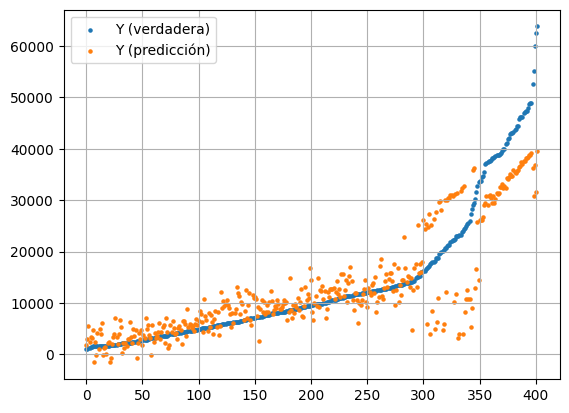

y_reg_polinomial


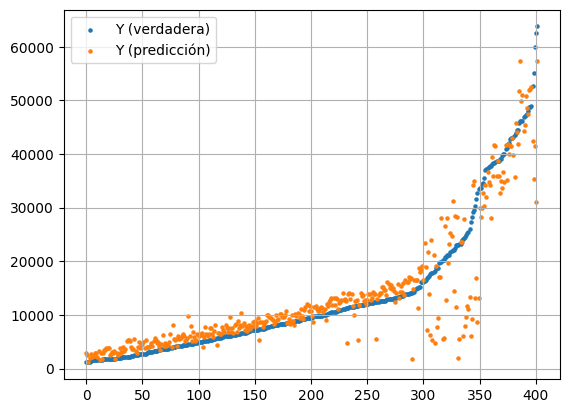

y_reg_ridge


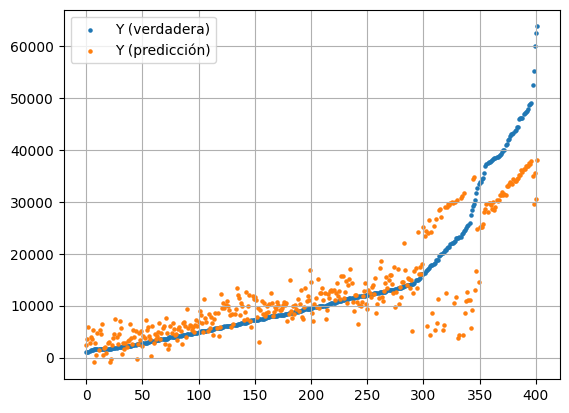

y_reg_lasso


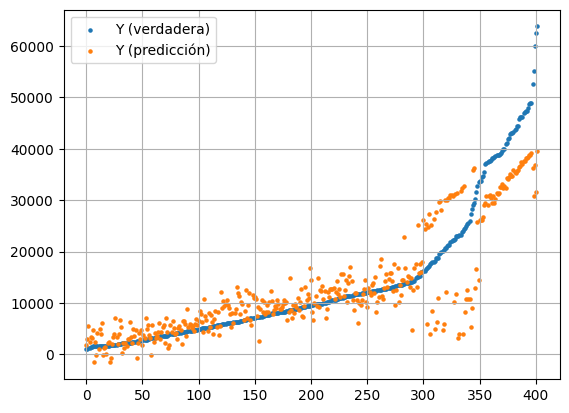

y_reg_lineal_SVM


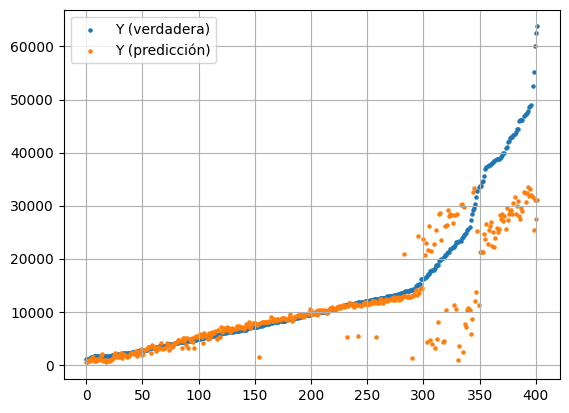

y_reg_polinomial_SVM


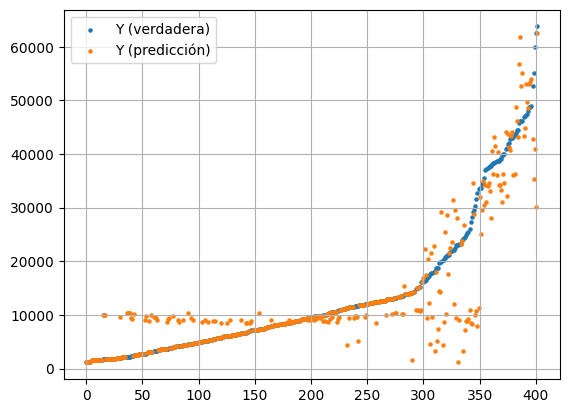

y_reg_tree


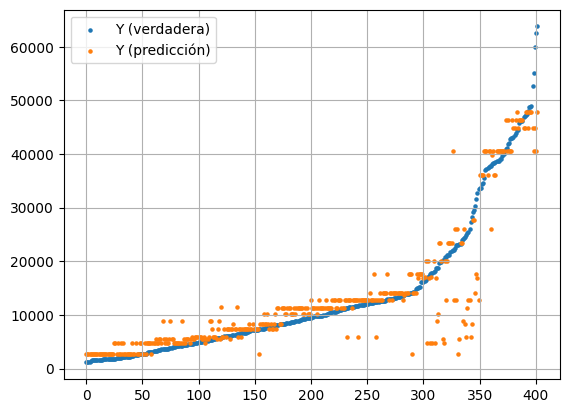

y_reg_voting


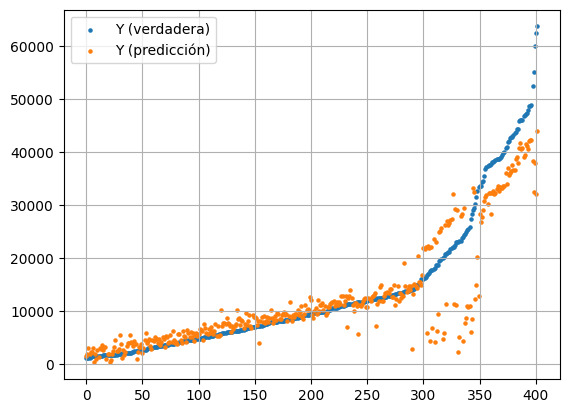

y_reg_bagging


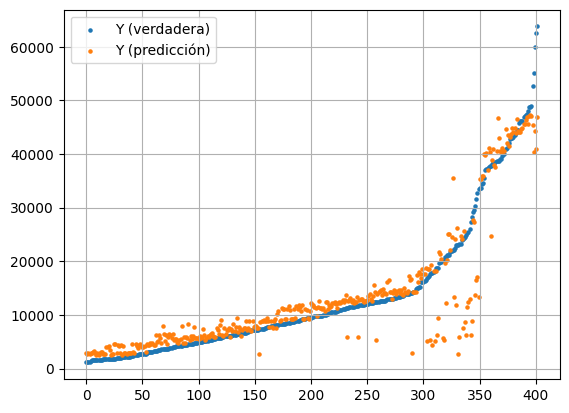

y_reg_boosting


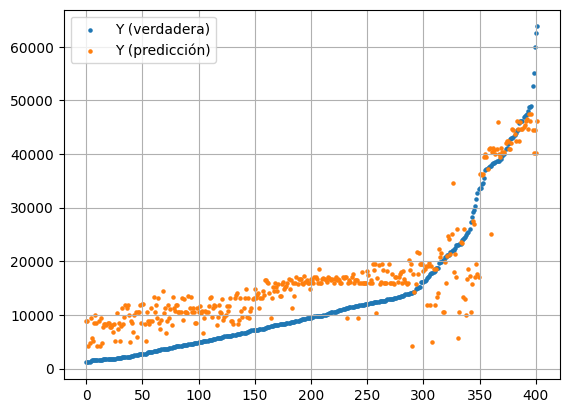

In [135]:
y_pred_df = pd.DataFrame()
y_pred_df['y_test'] = y_test
y_pred_df['y_reg_lineal'] = y_pred_li_test
y_pred_df['y_reg_polinomial'] = y_pred_po_test
y_pred_df['y_reg_ridge'] = y_pred_rid_test
y_pred_df['y_reg_lasso'] = y_pred_lasso_test
y_pred_df['y_reg_lineal_SVM'] = y_pred_li_svm_test
y_pred_df['y_reg_polinomial_SVM'] = y_pred_po_svm_test
y_pred_df['y_reg_tree'] = y_pred_tree_test
y_pred_df['y_reg_voting'] = y_pred_voting_test
y_pred_df['y_reg_bagging'] = y_pred_bagging_test
y_pred_df['y_reg_boosting'] = y_pred_boosting_test
y_pred_df.sort_values('y_test', inplace=True)

columnas = y_pred_df.columns.to_list()
columnas.pop(0)
columnas

for columna in columnas:
    print(columna)
    regression_visualization(y_true_=y_pred_df['y_test'], y_pred_=y_pred_df[columna])
